In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), activation='relu', input_shape=(100, 100, 3)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (4,4), strides = 1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])
model.load_weights('new_weights .h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 97, 97, 16)        784       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 32)        8224      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0

In [3]:
classes = ['a','b','c','d','del','e','f','g','h','i','j','k','l','m','n','nothing','o','p','q','r','s','space','t','u','v','w','x','y','z']

cur_text = ''
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    cv2.rectangle(frame, (50, 50), (350, 350), (0, 255, 0), 3)
    
    cropped_image = frame[50:350, 50:350]
    resized_frame = cv2.resize(cropped_image, (100,100))
    reshaped_frame = (np.array(resized_frame)).reshape((1,100,100,3))
    #frame_for_model = reshaped_frame / 255
    prediction = np.array(model.predict(reshaped_frame))
    predicted_class = classes[prediction.argmax()]      

    prediction_probability = prediction[0, prediction.argmax()]
    if prediction_probability > 0.2:
        cv2.putText(frame, '{} - {:.2f}%'.format(predicted_class, prediction_probability * 100), 
                                    (10, 450), 1, 2, (255, 255, 0), 2, cv2.LINE_AA)
        keypress = cv2.waitKey(1)
        if keypress == ord('s'):
            alph = predicted_class #chr(num+96)
            cur_text += alph
            print(cur_text)
        elif keypress == ord('q'):
            break
    else:
        cv2.putText(frame, 'space', (10, 450), 1, 2, (255, 255, 0), 2, cv2.LINE_AA)
    
    cv2.imshow('frame', frame)

    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [10]:
cap.release()
cv2.destroyAllWindows()

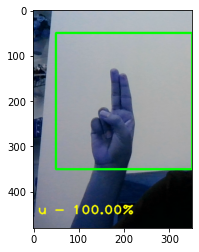

In [11]:
plt.imshow(frame[:,:350])